c:\Users\sminu\Task2_Movie_Rating_Prediction
['IMDb Movies India.csv']
Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


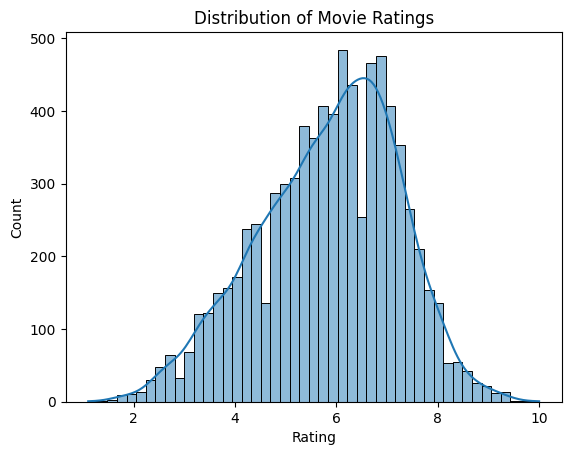

   Rating  Genre_Action, Adventure  Genre_Action, Adventure, Biography  \
1     7.0                    False                               False   
3     4.4                    False                               False   
5     4.7                    False                               False   
6     7.4                    False                               False   
8     5.6                    False                               False   

   Genre_Action, Adventure, Comedy  Genre_Action, Adventure, Crime  \
1                            False                           False   
3                            False                           False   
5                            False                           False   
6                            False                           False   
8                            False                           False   

   Genre_Action, Adventure, Drama  Genre_Action, Adventure, Family  \
1                           False                            Fal

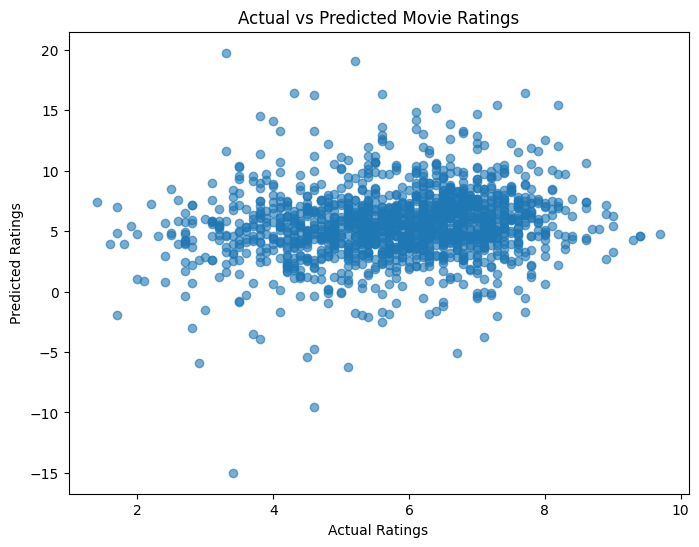

In [7]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Debug: Show current working directory
print(os.getcwd())

# Debug: List files in 'data' folder
print(os.listdir('data'))

# Load dataset with correct encoding
data = pd.read_csv('data/IMDb Movies India.csv', encoding='latin1')

# Preview columns and first rows
print(data.columns)
data.head()
# Basic info
data.info()

# Statistical summary
data.describe()

# Check missing values
data.isnull().sum()

# Plot distribution of target variable (Rating)
sns.histplot(data['Rating'], kde=True)
plt.title('Distribution of Movie Ratings')
plt.show()
# Keep relevant columns only
data = data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating']]

# Drop rows with missing values
data = data.dropna()

# Convert categorical columns into numeric (One-Hot Encoding)
data = pd.get_dummies(data, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

print(data.head())
X = data.drop('Rating', axis=1)
y = data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot Actual vs Predicted Ratings
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Movie Ratings')
plt.show()

